# Quick start (Python API)

In [1]:
import admix
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

In [2]:
dset_dir = admix.dataset.get_test_data_dir()

In [3]:
dset_admix = admix.io.read_dataset(join(dset_dir, "toy-admix"))
dset_all = admix.io.read_dataset(join(dset_dir, "toy-all"))

In [4]:
dset_all

admix.Dataset object with n_snp x n_indiv = 1834 x 268, no local ancestry
	snp: 'CHROM', 'POS', 'REF', 'ALT'
	indiv: 'PAT', 'MAT', 'SEX', 'SuperPop', 'Population'

/home/runner/work/admix-kit/admix-kit/admix/plot/_plot.py:345: UserWarning: Only the first 10 are plotted. To plot more individuals, increase `max_indiv`
  warnings.warn(


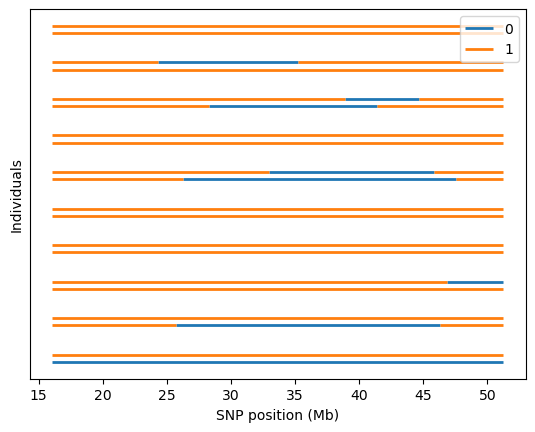

In [5]:
admix.plot.lanc(dset=dset_admix)

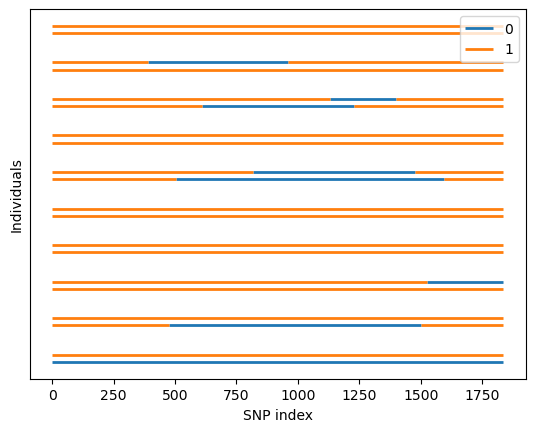

In [6]:
admix.plot.lanc(lanc=dset_admix.lanc.compute())

In [7]:
# Now we simulate phenotype for these admixed individuals.
np.random.seed(1234)
sim = admix.simulate.quant_pheno(dset=dset_admix, hsq=0.5, n_causal=2, n_sim=2)
beta, pheno_g, pheno = sim["beta"], sim["pheno_g"], sim["pheno"]
print(beta.shape)  # (n_snp, n_anc, n_sim)
print(pheno_g.shape)  # (n_indiv, n_sim)
print(pheno.shape)  # (n_indiv, n_sim)

admix.simulate.quant_pheno:   0%|          | 0/2 [00:00<?, ?it/s]

admix.simulate.quant_pheno: 100%|██████████| 2/2 [00:00<00:00, 182.99it/s]

(1834, 2, 2)
(61, 2)
(61, 2)


In [8]:
sim_i = 1
sim_pheno = pheno[:, sim_i]
sim_beta = beta[:, :, sim_i]
df_assoc = admix.assoc.marginal(
    dset=dset_admix,
    pheno=sim_pheno,
    method="ATT",
    family="linear",
)

admix.assoc.marginal:   0%|          | 0/2 [00:00<?, ?it/s]

admix.assoc.marginal: 100%|██████████| 2/2 [00:00<00:00, 135.17it/s]

In [9]:
df_assoc

,G_BETA,G_SE,N,P
snp,,,,
rs148050615,0.454393,0.573420,61,0.431287
rs12160291,-1.296505,1.110985,61,0.247910
rs200031263,0.399336,0.268912,61,0.142865
rs148779243,-0.025490,0.191752,61,0.894700
rs5746279,-0.271912,0.258380,61,0.296920
...,...,...,...,...
rs12166626,1.509744,0.481625,61,0.002680
rs5770995,-0.159861,0.204451,61,0.437397
rs113267916,0.329944,0.574861,61,0.568180


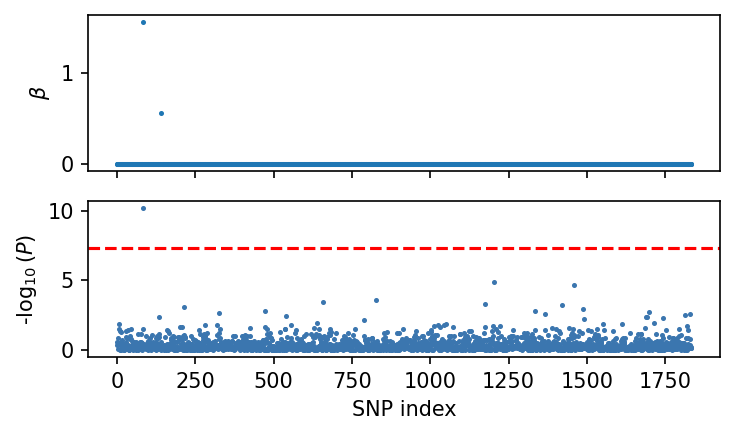

In [10]:
fig, axes = plt.subplots(nrows=2, figsize=(5, 3), dpi=150, sharex=True)
axes[0].scatter(np.arange(dset_admix.n_snp), sim_beta[:, 0], s=2)
axes[0].set_ylabel(r"$\beta$")

admix.plot.manhattan(df_assoc.P, ax=axes[1], s=2)
plt.tight_layout()
plt.show()